In [1]:
import pandas as pd 

In [2]:
dataset=pd.read_csv(r'C:\Users\TOTO\Documents\train.csv')

In [3]:
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
dataset["toxic"].unique()

array([0, 1], dtype=int64)

In [5]:
dataset["toxic"].count()

159571

In [6]:
X=dataset['comment_text']
y=dataset['toxic']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
CV=CountVectorizer()

In [9]:
CV.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [10]:
v_x=CV.transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(v_x,y,test_size=0.3,random_state=0)

In [12]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
y_pred=mnb.fit(X_train,y_train).predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[42173  1108]
 [ 1749  2842]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     43281
           1       0.72      0.62      0.67      4591

    accuracy                           0.94     47872
   macro avg       0.84      0.80      0.82     47872
weighted avg       0.94      0.94      0.94     47872



In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9403200200534759

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
y_pred_lr=lr.fit(X_train,y_train).predict(X_test)

C:\Users\TOTO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

[[42759   522]
 [ 1528  3063]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     43281
           1       0.85      0.67      0.75      4591

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [19]:
accuracy_score(y_test, y_pred_lr)

0.9571774732620321

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
y_pred_dt=classifier.predict(X_test)

[[41900  1381]
 [ 1563  3028]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     43281
           1       0.69      0.66      0.67      4591

    accuracy                           0.94     47872
   macro avg       0.83      0.81      0.82     47872
weighted avg       0.94      0.94      0.94     47872



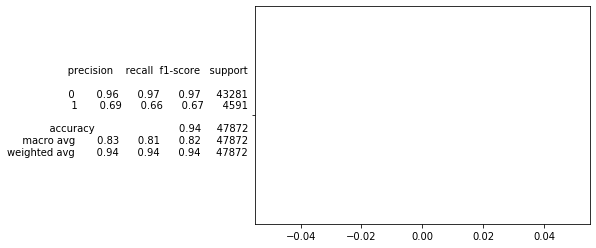

In [37]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

In [26]:
accuracy_score(y_test, y_pred_dt)

0.9385026737967914

In [46]:
import seaborn as sns
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

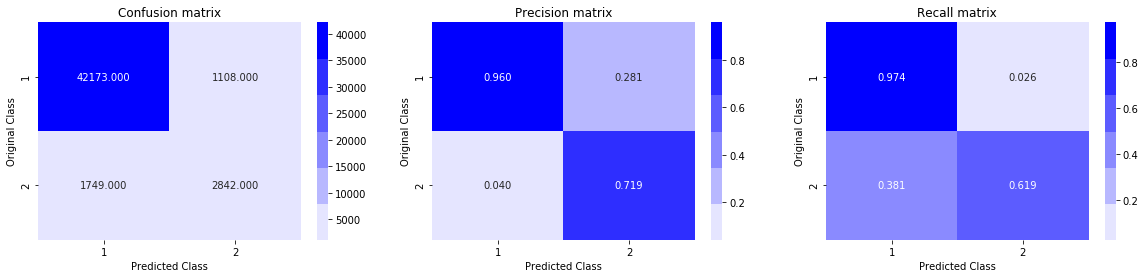

In [47]:
plot_confusion_matrix(y_test,y_pred)